In [1]:
import HYuPlot as hyuplt 
import FerrersModel as ferrers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cl

import astropy.io.fits as ft

from data_functions import get_kinematics

In [30]:
#Import GALAH DR4 data
filename='./data/galah_dr4_vac_dynamics_240705.fits'

Galah=ft.open(filename)

galah_dynamics=Galah[1].data
Galah.close()

In [3]:
#E_J=-.75, y0=-1.65 (LSR?)
#-.72;-1.65 (Hyades)
#-.67;-1.85 (Hyades) 
L_Z=galah_dynamics['L_Z']
V_R=galah_dynamics['vR_Rzphi']
cdt_good = ~np.isnan(L_Z) & ~np.isnan(V_R)
cdt_SNd=(galah_dynamics['X_XYZ']**2+galah_dynamics['Y_XYZ']**2)<1 & (np.abs(galah_dynamics['z_Rzphi'])<1)

In [4]:
#E_J=-.75, y0=-1.65 (LSR?)
#-.72;-1.65 (Hyades) actually part of the Trojan family
#-.67;-1.85 (Hyades?) -4:1
#-.65;-2.18 -4:1 group 
#-.75;-2 -4:1
#-.8;-2.2 outer disk: Arch/Hat

# How about Horn?
# Most of these orbits are symmetric, what caused teh asymmetry in Horn/Sirius

#Theory: 
# -4:1 QPO groups form Hyades
# Asymmetry in Sirius: -4:1 at lower E_J? #not certain
# LSR/Coma: Outer Circular
# 

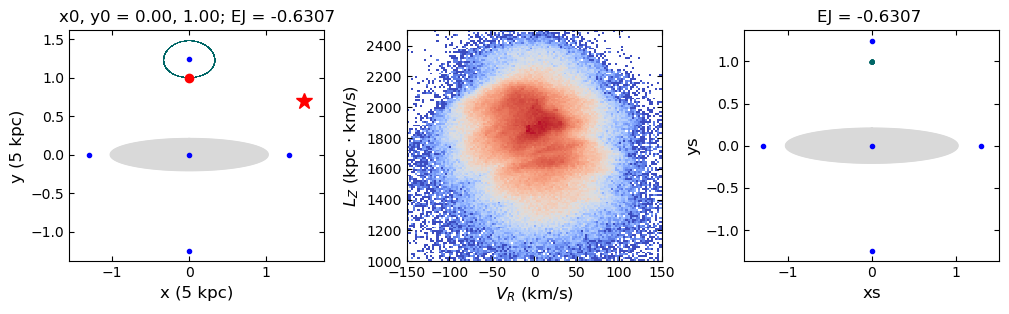

In [31]:
# Let's make some plots about our orbits 
# creat a 1x3 grid
plot=hyuplt.PlotGrid(figsize=(3,12),gridshape=(1,3))
plot.wspace=.325 #allow some extra wspace for labels

# Let's be simple, just one subplot per gridpoint
plot.GetAXS()
plot.xlabel=None
plot.ylabel=None
plot.title=""
# 'Three typical plots used for Ferrers Project'
plot.FigLabel()

# get the axs
axs=plot.axs

# define the initial condition with EJ
init=ferrers.InitialCondition()
# 1.    , -0.6307
init.ej=-.6307
init.y0=1
init.InitFromEj()

# Get an instance from orbitplot
orbitplot=ferrers.PlotFerrers(init=init)


# plot the orbit in the XY plane in the first subplot
ax=axs[0]

# integrate orbit
# orbitplot.orbit.tmax=10000
orbitplot.GetOrbit()

# plot the XY plane
orbitplot.PlotXY(linewidth=.2,ax=ax)

# plot the sun and SNd passing orbits
orbitplot.PlotSNd(ax=ax,markersize=12)


# plot the SNd-LzVr in the second subplot (M2K)
ax=axs[1]
# Usually we do this on top of the LzVr density in the solar neighbourhood
cdt = cdt_good & cdt_SNd
picrange=[[-150,150],[1000,2500]]
X=V_R[cdt]
Y=L_Z[cdt]
ax.hist2d(X,Y,
           bins=120,
           cmap="coolwarm",
           norm=cl.LogNorm(),
           zorder=1,
           range=picrange,
           )

Lz_Nd,vr_Nd=orbitplot.PlotM2K(ax=ax,zorder=10,markersize=.1) 

# plot the surface of secation of this orbit in the third plot
ax=axs[2]
xs,ys=orbitplot.PlotSOS(ax=ax)

plt.show()

In [5]:
fig_path="/home/hyuleep/astr_honours/Hercules/figs_presentation/"


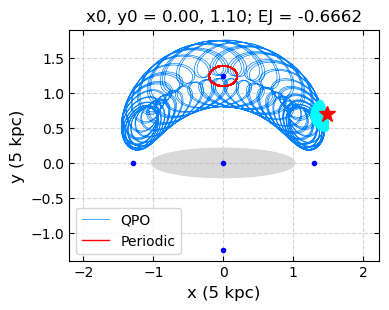

In [8]:

plot=hyuplt.PlotGrid(figsize=(3,4),gridshape=(1,1))

# Let's be simple, just one subplot per gridpoint
plot.GetAXS()
plot.xlabel=None
plot.ylabel=None
plot.title=""
# 'Three typical plots used for Ferrers Project'
plot.FigLabel()

# get the axs
axs=plot.axs

# define the initial condition with EJ
init=ferrers.InitialCondition()
# 1.    , -0.6307
init.ej=-.6662
init.y0=.8
init.InitFromEj()

# Get an instance from orbitplot
orbitplot=ferrers.PlotFerrers(init=init)


# plot the orbit in the XY plane in the first subplot
ax=axs[0]

# integrate orbit
# orbitplot.orbit.tmax=10000
orbitplot.GetOrbit()

# plot the XY plane
orbitplot.PlotXY(linewidth=.5,ax=ax,color="#0080ff",auto=False,plotinit=False)

############################################

init=ferrers.InitialCondition()
# 1.    , -0.6307
init.ej=-.6662
init.y0=1.1
init.InitFromEj()

# Get an instance from orbitplot
orbitplot2=ferrers.PlotFerrers(init=init)


# plot the orbit in the XY plane in the first subplot
ax=axs[0]

# integrate orbit
# orbitplot.orbit.tmax=10000
orbitplot2.GetOrbit()

# plot the XY plane
orbitplot2.PlotXY(linewidth=1,ax=ax,color="#ff0000",auto=True,plotinit=False)
ax.legend(["QPO","Periodic"])

# plot the sun and SNd passing orbits
orbitplot.PlotSNd(ax=ax,markersize=12,linewidth=.5)
ax.grid(linestyle="--",alpha=.5)

# plt.show()
plt.savefig(fig_path+"trojan_fast.png",dpi=300,bbox_inches="tight")

In [6]:
x,y,vx,vy = orbitplot.orbit.orbit

In [16]:
orbitplot.orbit.tmax

500

In [7]:
def fft(f):
    num = len(f)
    f_ft = np.fft.fft(f, norm='forward')
    k = np.fft.fftfreq(num) * num

    # shift 0-frequency to the centre
    k = np.fft.fftshift(k)
    f_ft = np.fft.fftshift(f_ft)

    # compute spectrum
    k_spect = k[num//2:] # these are only the positive wavennumbers (for plotting the spectrum below)
    f_ft_pos = f_ft[k >= 0] # Fourier-transformed y where k >= 0
    f_ft_neg = f_ft[k <= 0][1:] # Fourier-transformed y where k <= 0 (excluding the Nyquist frequency; here k = -100)
    f_ft_neg = np.flip(f_ft_neg) # fold the negative modes onto the positive-mode indices
    f_spect = abs(f_ft_pos)**2 + abs(f_ft_neg)**2 # this is now the spectrum
    f_spect[0] /= 2 # correct the k=0 mode, which should not be counted twice, but we did in the previous line
    return k_spect,f_spect

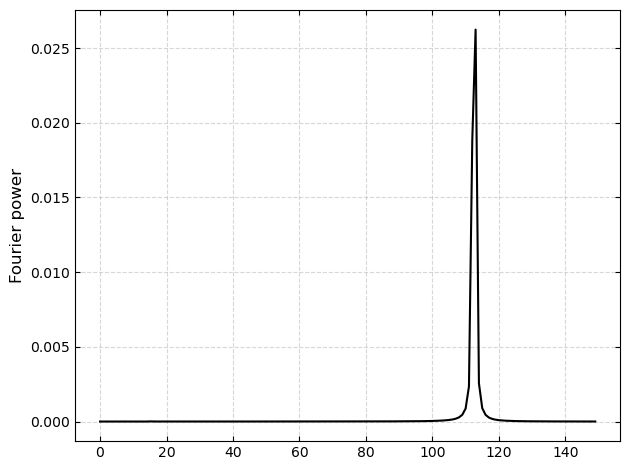

In [8]:
k,power=fft(x)
plt.plot(k[0:150],power[0:150],'-',color='k')
# ax.plot([slow_f,slow_f],[0,max(power[0:150])],'k--',alpha=1)
# ax.plot([fast_f,fast_f],[0,max(power[0:150])],'k--',alpha=1)
plt.grid(linestyle='--',alpha=.5,zorder=0)
plt.gca().tick_params(axis='both', direction='in',bottom=True, top=True, left=True, right=True,zorder=100)
plt.ylabel('Fourier power',fontsize=12)
plt.tight_layout()

In [9]:
idx=np.argmax(power)
print(k[idx])

113.00000000000001


In [10]:
import astropy.units as u

In [11]:
omega=40*u.km/u.s/u.kpc
print(omega.si)
time=500/omega

1.2963117157777463e-15 1 / s


In [12]:
freq=(113/(time)).to(1/u.Gyr)
print(freq)

9.245317972013083 1 / Gyr


In [15]:
freq=(12/(time)).to(1/u.Gyr)
print(freq)

0.9818036784438673 1 / Gyr
